# Explore here

In [45]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Paso 1: Crear una cuenta de desarrollador de Spotify
# Paso 2: Configuración inicial
# Paso 3: Variables de entorno

client_id = os.environ.get('78b07631aa7f45619f30648a3fec32aa')
client_secret = os.environ.get('b15d856616fc4d068ff0dae2e610a7d5')



In [46]:
# Paso 4: Inicializar la biblioteca Spotipy

import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials


con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = '78b07631aa7f45619f30648a3fec32aa',
                                                              client_secret = 'b15d856616fc4d068ff0dae2e610a7d5'))




In [23]:
# Paso 5: Realizar solicitudes a la API

artist_id = "1McMsnEElThX1knmY4oliG"

response = con.artist_top_tracks("1McMsnEElThX1knmY4oliG")

if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [43]:
# Paso 6: Transformar a Pandas DataFrame

import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = False)

print(tracks_df.head(5))

   duration_ms             name  popularity
0     3.662067          vampire          89
1     2.842350         obsessed          87
2     3.820433          traitor          86
3     3.591767          deja vu          86
4     4.033550  drivers license          85


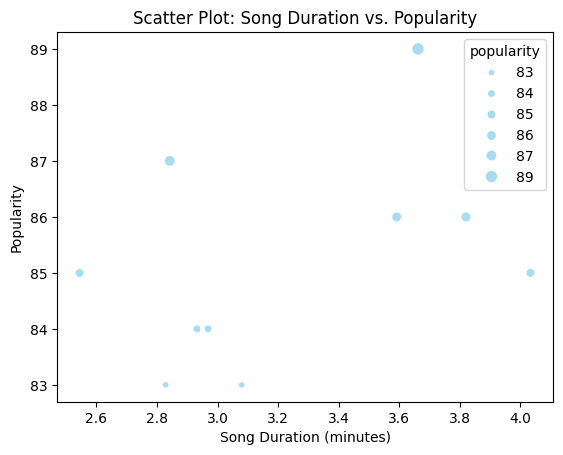

In [44]:
# Paso 7: Analizar relación estadística
import seaborn as sns
import matplotlib.pyplot as plt


duration = tracks_df['duration_ms']
popularity = tracks_df['popularity']

sns.scatterplot(
    x=duration,
    y=popularity,
    data=tracks_df,
    size='popularity',
    alpha=0.7,
    color='skyblue'
   
)

# Add labels and title
plt.xlabel('Song Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Song Duration vs. Popularity')

# Show the plot
plt.show()